In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df['target'].count()

303

In [5]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Visualization

<AxesSubplot:xlabel='age', ylabel='chol'>

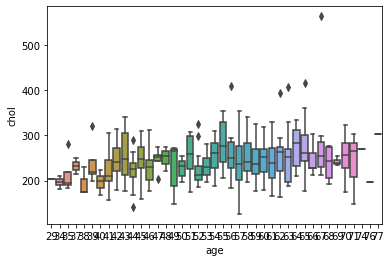

In [8]:
sns.boxplot(data=df,x='age',y='chol')

<AxesSubplot:xlabel='target', ylabel='count'>

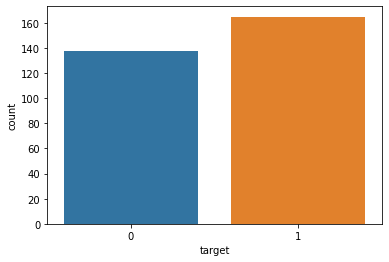

In [9]:
sns.countplot(data=df,x='target')

In [10]:

df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

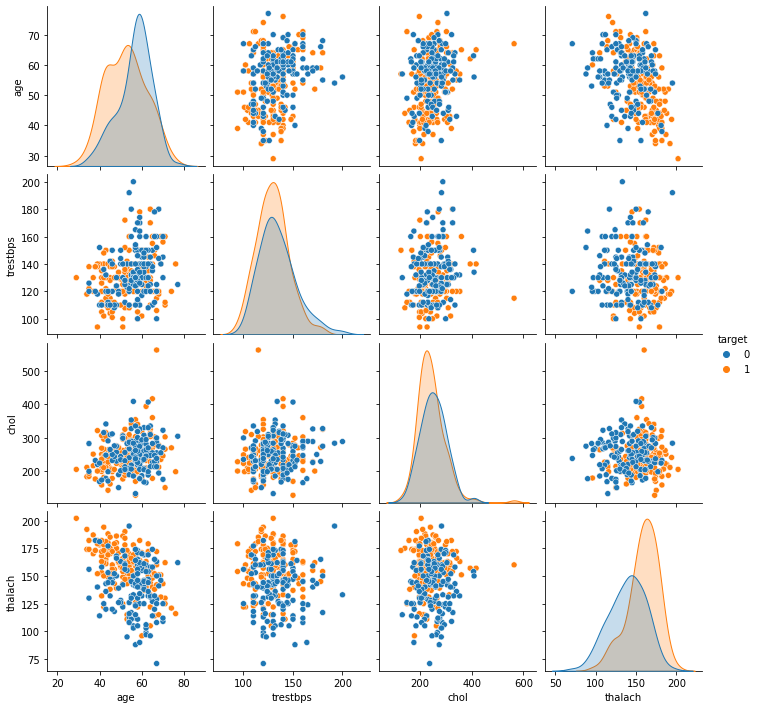

In [11]:
sns.pairplot(df[['age','trestbps','chol','thalach','target']],hue='target')

<AxesSubplot:xlabel='chol', ylabel='age'>

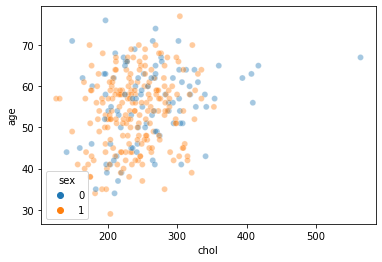

In [12]:
sns.scatterplot(data=df,x='chol',y='age',hue='sex', alpha=0.4)

<AxesSubplot:>

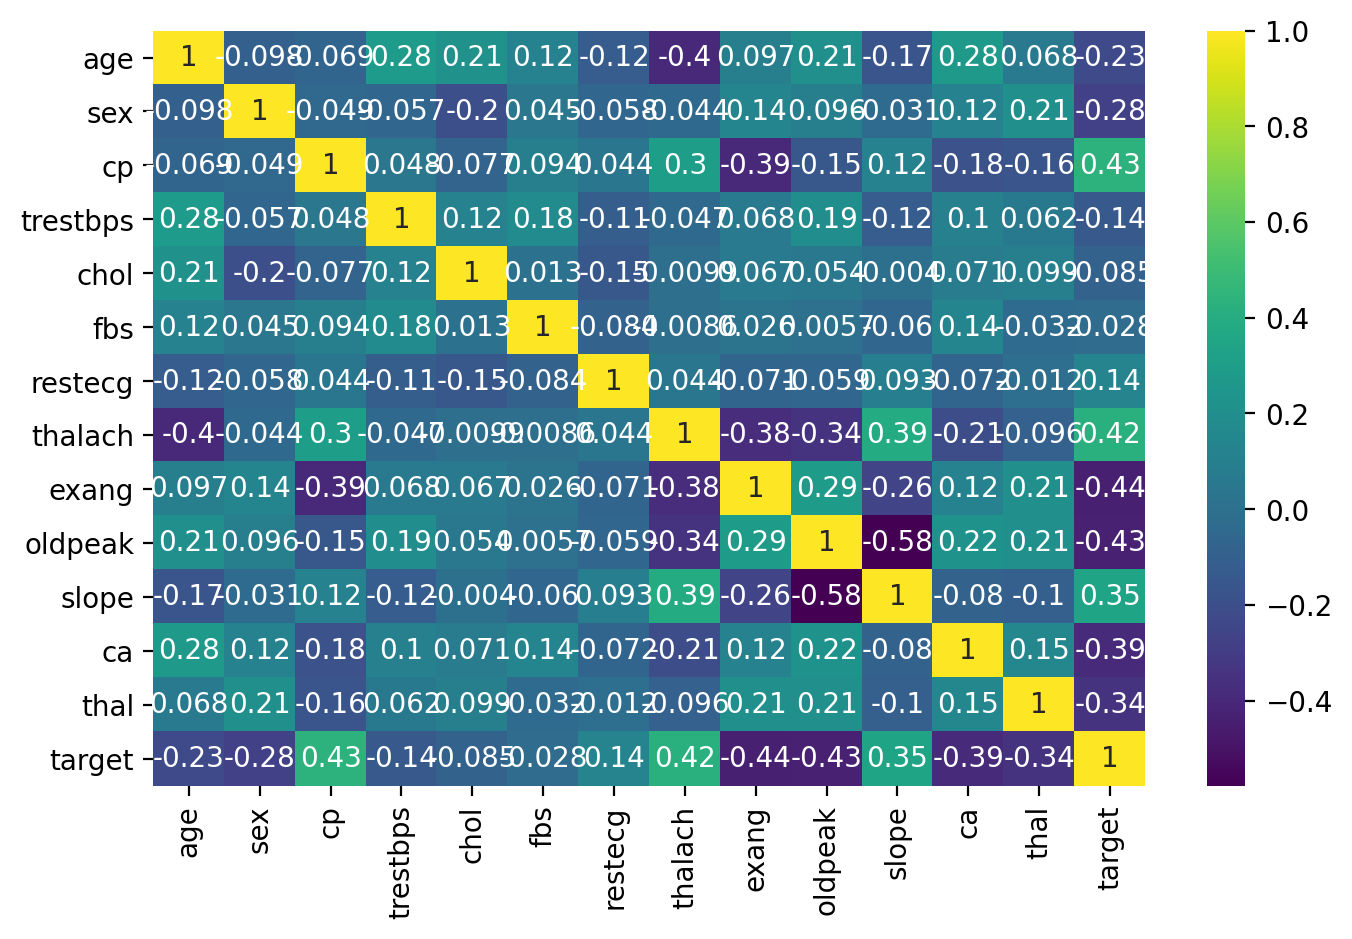

In [13]:
plt.figure(figsize=(8,5),dpi=200)
sns.heatmap(df.corr(),annot=True,cmap='viridis')

# Splitting,Scaling

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import StandardScaler

X=df.drop('target',axis=1)
y=df['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=101)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Logistic Regression Model

In [15]:
from sklearn.linear_model import LogisticRegressionCV
log_model=LogisticRegressionCV()


In [16]:
log_model.fit(X_train,y_train)


LogisticRegressionCV()

In [17]:
log_model.C_

array([0.04641589])

In [18]:
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

# Coefficients

In [19]:
log_model.coef_[0]

array([-0.09621199, -0.39460154,  0.53534731, -0.13850191, -0.08830462,
        0.02487341,  0.08083826,  0.29914053, -0.33438151, -0.352386  ,
        0.25101033, -0.49735752, -0.37448551])

In [20]:
coefs=pd.Series(index=X.columns,data=log_model.coef_[0])

In [21]:
coefs

age        -0.096212
sex        -0.394602
cp          0.535347
trestbps   -0.138502
chol       -0.088305
fbs         0.024873
restecg     0.080838
thalach     0.299141
exang      -0.334382
oldpeak    -0.352386
slope       0.251010
ca         -0.497358
thal       -0.374486
dtype: float64

<AxesSubplot:>

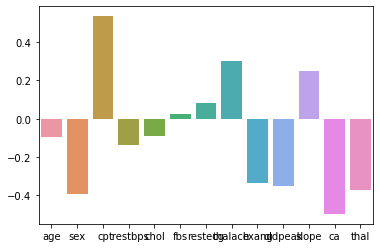

In [22]:
sns.barplot(x=coefs.index,y=coefs.values)

<AxesSubplot:>

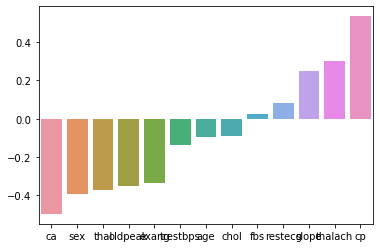

In [23]:
coefs=coefs.sort_values()
sns.barplot(x=coefs.index,y=coefs.values)

# Confusion,Classification,Plot Confusion Matrix

In [24]:
y_pred=log_model.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [26]:
confusion_matrix(y_test,y_pred)

array([[12,  3],
       [ 2, 14]], dtype=int64)

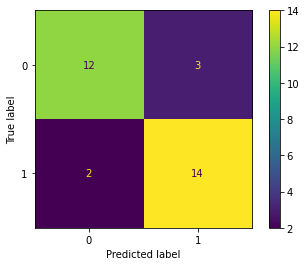

In [27]:
plot_confusion_matrix(log_model,X_test,y_test)

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



# Performance Curve

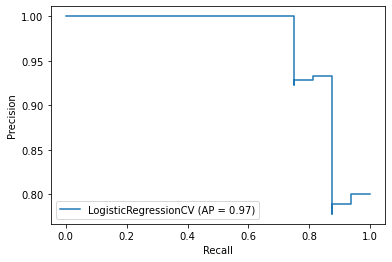

In [29]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

plot_precision_recall_curve(log_model,X_test,y_test)

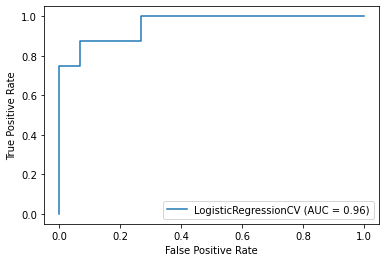

In [30]:
plot_roc_curve(log_model,X_test,y_test)

# Example

In [31]:
patient=[[54,1,0,122,286,0,0,116,1,3.2,1,2,2]]

In [32]:
log_model.predict(patient)

array([0], dtype=int64)

In [33]:
log_model.predict_proba(patient)

array([[9.99999862e-01, 1.38455917e-07]])